In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
data=df.copy()
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [3]:
print(f"Dataset shape: {data.shape}")

print("\n Dataset Information: ")
data.info()

Dataset shape: (5110, 12)

 Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
#check for any duplicate data
data.duplicated().sum()

0

In [5]:
print("\n Statistics of Data")
print(data.describe().T)


 Statistics of Data
                    count          mean           std    min        25%  \
id                 5110.0  36517.829354  21161.721625  67.00  17741.250   
age                5110.0     43.226614     22.612647   0.08     25.000   
hypertension       5110.0      0.097456      0.296607   0.00      0.000   
heart_disease      5110.0      0.054012      0.226063   0.00      0.000   
avg_glucose_level  5110.0    106.147677     45.283560  55.12     77.245   
bmi                4909.0     28.893237      7.854067  10.30     23.500   
stroke             5110.0      0.048728      0.215320   0.00      0.000   

                         50%       75%       max  
id                 36932.000  54682.00  72940.00  
age                   45.000     61.00     82.00  
hypertension           0.000      0.00      1.00  
heart_disease          0.000      0.00      1.00  
avg_glucose_level     91.885    114.09    271.74  
bmi                   28.100     33.10     97.60  
stroke               

**DATA PREPROCESSING**

In [6]:
print("\n missing values per column: ")
missing_values=data.isna().sum()
print(missing_values)


 missing values per column: 
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


missing values plot: 



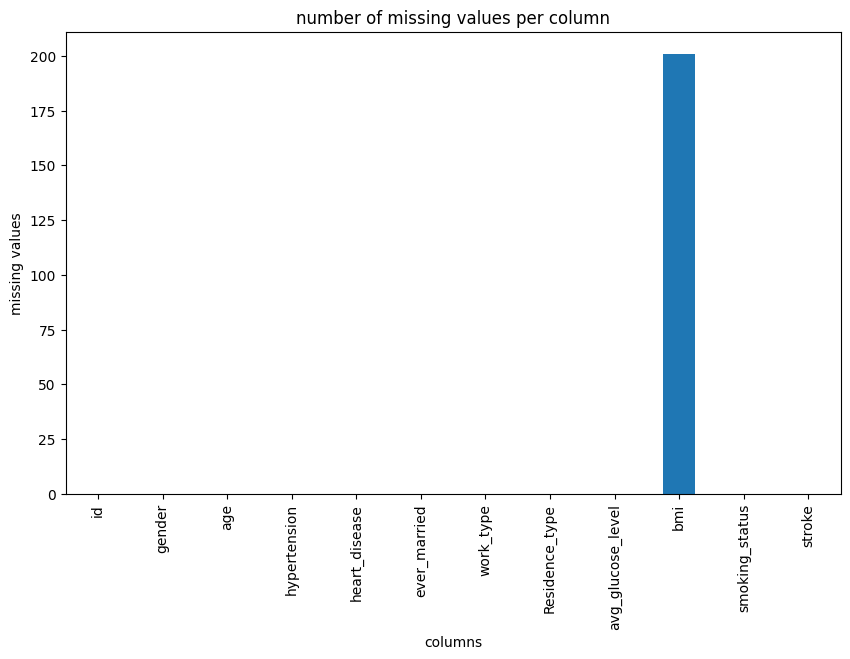

In [7]:
print("missing values plot: \n")
plt.figure(figsize=(10,6))
missing_values.plot(kind='bar')
plt.title('number of missing values per column')
plt.xlabel('columns')
plt.ylabel('missing values')
plt.xticks(rotation=90)
plt.show()

In [8]:
data.dropna(inplace=True)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
data['ever_married'].value_counts()

ever_married
Yes    3204
No     1705
Name: count, dtype: int64

In [11]:
data['work_type'].value_counts()

work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

In [12]:
data['Residence_type'].value_counts()

Residence_type
Urban    2490
Rural    2419
Name: count, dtype: int64

In [13]:
data['smoking_status'].value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64

**data cleaning**

In [14]:
# Drop rows where smoking_status is 'Unknown'
data = data.drop(data[data['smoking_status'] == 'Unknown'].index)

# Drop the 'id' column
data = data.drop('id', axis=1)

# Verify the changes
print("Dataset shape after dropping 'Unknown' smoking status and 'id' column:", data.shape)
print("\nUnique values in smoking_status:", data['smoking_status'].unique())

Dataset shape after dropping 'Unknown' smoking status and 'id' column: (3426, 11)

Unique values in smoking_status: ['formerly smoked' 'never smoked' 'smokes']


In [15]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


**age and stroke relation**

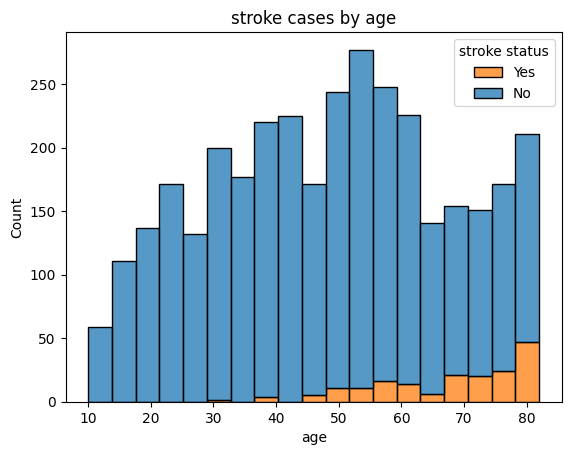

In [16]:
sns.histplot(data,x='age',hue='stroke',multiple='stack')
plt.title('stroke cases by age')
plt.legend(title='stroke status', labels=['Yes','No'])
plt.show()

In [17]:
stroke_count=data['stroke'].value_counts()
stroke_count

stroke
0    3246
1     180
Name: count, dtype: int64

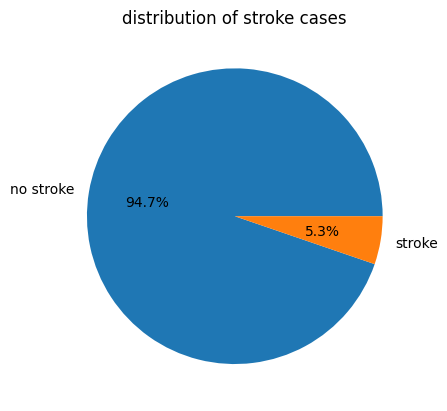

In [18]:
#presented in pie chart
stroke_count=[3246,180]
labels=('no stroke','stroke')
plt.pie(stroke_count,labels=labels,autopct='%1.1f%%')
plt.title('distribution of stroke cases')
plt.show()

**gender and stroke relation**

In [19]:
data['gender'].value_counts()

gender
Female    2086
Male      1339
Other        1
Name: count, dtype: int64

In [20]:
stroke_rate_gender=data.groupby('gender')['stroke'].mean() #all the rows with the same gender are grouped together and the mean of the stroke column for each gender is calculated.
stroke_rate_gender

gender
Female    0.050336
Male      0.056012
Other     0.000000
Name: stroke, dtype: float64

In [58]:
stroke_count_gender=stroke_rate_gender*data['gender'].value_counts()
stroke_count_gender
#calculates the number of stroke cases for each gender.

gender
Female    105.0
Male       75.0
Other       0.0
dtype: float64

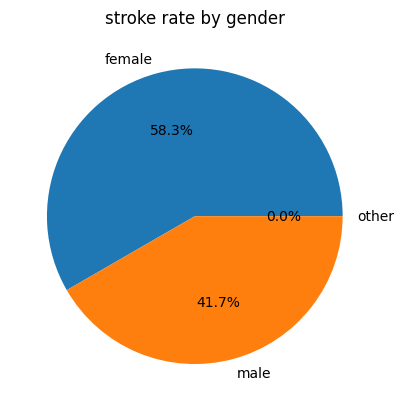

In [22]:
plt.pie(stroke_count_gender,labels=['female','male','other'],autopct='%1.1f%%')
plt.title('stroke rate by gender')
plt.show()

**smoking status and stroke relation**

In [23]:
data['smoking_status'].value_counts()

smoking_status
never smoked       1852
formerly smoked     837
smokes              737
Name: count, dtype: int64

In [24]:
stroke_rate_smoke=data.groupby('smoking_status')['stroke'].mean()
stroke_rate_smoke

smoking_status
formerly smoked    0.068100
never smoked       0.045356
smokes             0.052917
Name: stroke, dtype: float64

In [25]:
smoking_data={'smoking_status':['formerly smoked','never smoked','smokes'],
							'stroke_rate':[0.068100,0.045356,0.052917]}

In [26]:
smoke_stroke=pd.DataFrame(smoking_data)
smoke_stroke

,smoking_status,stroke_rate
0,formerly smoked,0.068100
1,never smoked,0.045356
2,smokes,0.052917


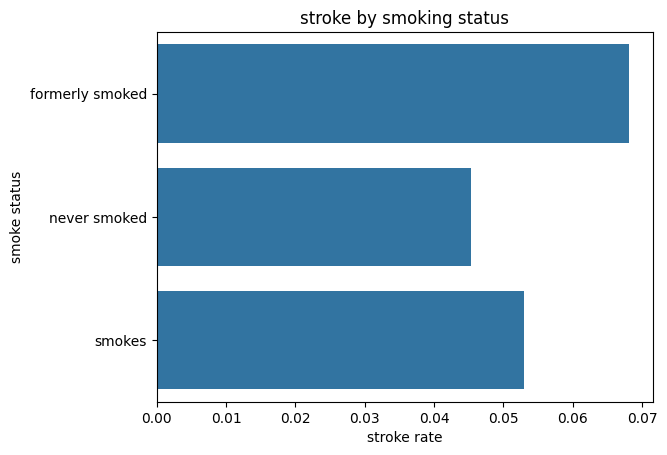

In [27]:
sns.barplot(data=smoke_stroke,y='smoking_status',x='stroke_rate')
plt.title('stroke by smoking status')
plt.xlabel('stroke rate')
plt.ylabel('smoke status')
plt.show()

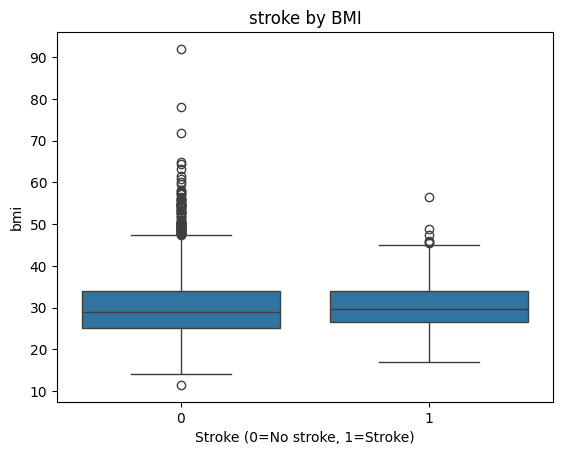

In [28]:
#is there a relationship between BMI and stroke?
sns.boxplot(x='stroke',y='bmi',data=data)
plt.title('stroke by BMI')
plt.xlabel('Stroke (0=No stroke, 1=Stroke)')
plt.ylabel('bmi')
plt.show()
#this is to show outliers. there are outliers in stroke wrt bmi so it has less chance to be a risk factor for stroke

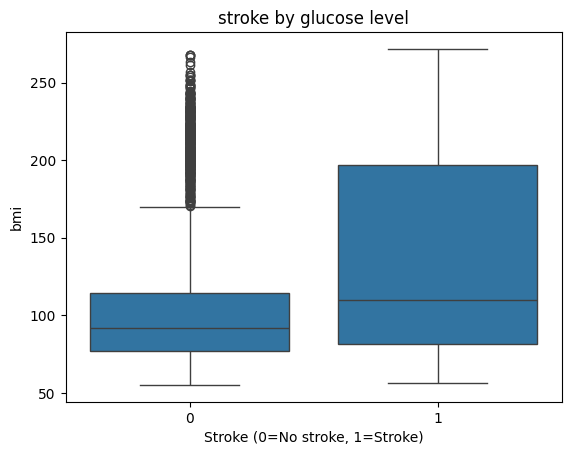

In [29]:
sns.boxplot(x='stroke',y='avg_glucose_level',data=data)
plt.title('stroke by glucose level')
plt.xlabel('Stroke (0=No stroke, 1=Stroke)')
plt.ylabel('bmi')
plt.show()
#outliers are there in no stroke(can be ignored). so basically as glucose level increases, chances of getting stroke also increases.so there is chance of glucose level being a risk factor.
#in box plot focus on the stroke cases.

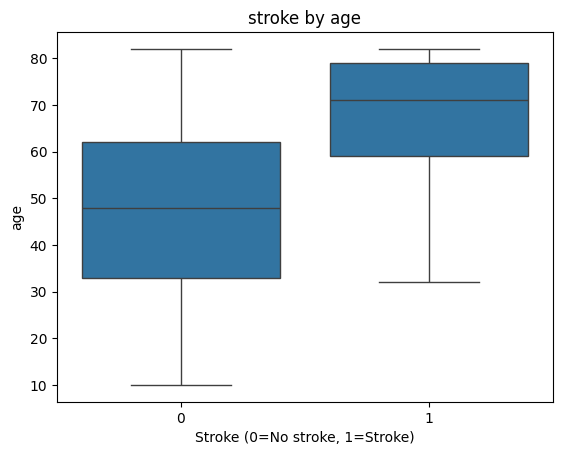

In [59]:
sns.boxplot(x='stroke',y='age',data=data)
plt.title('stroke by age')
plt.xlabel('Stroke (0=No stroke, 1=Stroke)')
plt.ylabel('age')
plt.show()
#age does not have any outliers. as age increases the chance of getting stroke is high.

**Data encoding using one-hot encoding, Balancing using SMOTE**

In [30]:
print(data['stroke'].value_counts())

stroke
0    3246
1     180
Name: count, dtype: int64


In [31]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)
#categorical columns are encoded using one hot encoding.


Categorical Columns: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


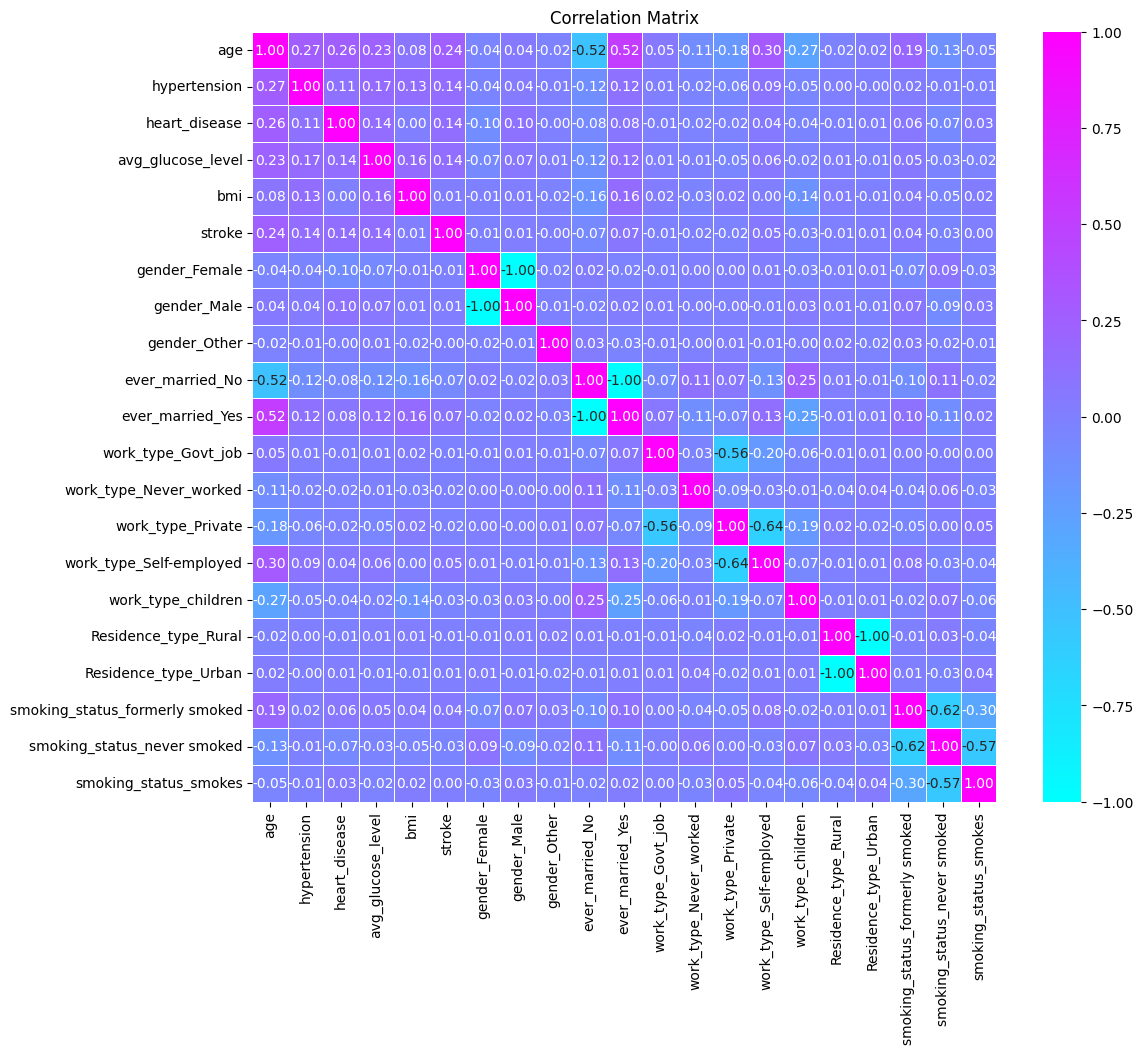

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=False) #one hot encoding applied. drop_first=false means the first category of the column wont be dropped.

# convert true or false to integer. as integers format is needed to compute the correlation matrix.
data_encoded = data_encoded.astype(int)

# correlation matrix is computed.
correlation_matrix = data_encoded.corr()

# heatmap of correlation matrix is plotted
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='cool', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

"""
1- strong positive relation
0- no correlation
-1- strong negative relation
"""

In [33]:
data_encoded

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
2,80,0,1,105,32,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3,49,0,0,171,34,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,79,1,0,174,24,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
5,81,0,0,186,29,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,82,1,0,71,28,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
5102,57,0,0,77,21,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5106,81,0,0,125,40,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
5107,35,0,0,82,30,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0


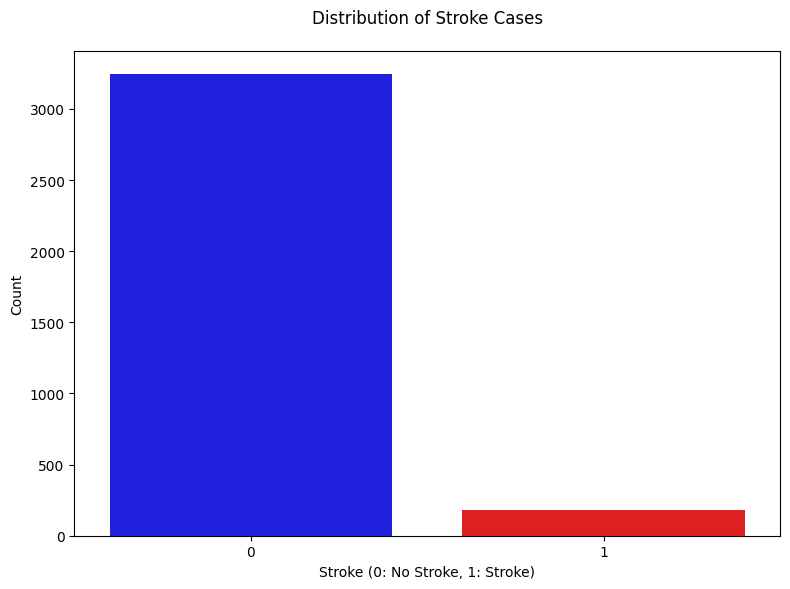

In [61]:
#before balancing data.
plt.figure(figsize=(8, 6)) # 8 inches-width,6-height
sns.countplot(data=data_encoded, x='stroke',hue='stroke', palette=['blue', 'red'],legend=False)
plt.title('Distribution of Stroke Cases', pad=20)
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [35]:
from imblearn.over_sampling import SMOTE

X = data_encoded.drop(columns=["stroke"])  # Drop target column
y = data_encoded["stroke"]  # Target column

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.90, random_state=42)  #ensures that minority class reaches 90% to the majority class.
X_balanced, y_balanced = smote.fit_resample(X, y) # creates synthetic samples.

# Check the new class distribution
data_balanced = pd.DataFrame(X_balanced, columns=X.columns)
data_balanced['stroke'] = y_balanced


print("\nBalanced class distribution after SMOTE:")
print(data_balanced['stroke'].value_counts())


Balanced class distribution after SMOTE:
stroke
0    3246
1    2921
Name: count, dtype: int64


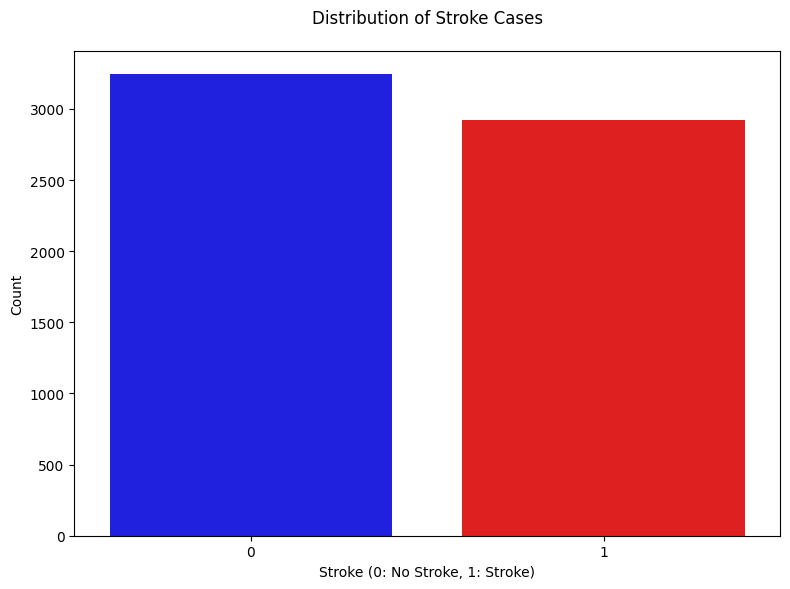

In [36]:
#after balancing with SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(data=data_balanced, x='stroke',hue='stroke', palette=['blue', 'red'],legend=False)
plt.title('Distribution of Stroke Cases', pad=20)
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [37]:
data_balanced.shape

(6167, 21)

In [38]:
data_balanced

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67,0,1,228,36,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,1
1,80,0,1,105,32,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1
2,49,0,0,171,34,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,1
3,79,1,0,174,24,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,1
4,81,0,0,186,29,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,71,0,0,131,28,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6163,67,0,0,137,30,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
6164,35,0,0,79,25,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6165,74,0,1,243,26,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Bidirectional, LSTM, Dropout, BatchNormalization
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split Features & target variable
X = data_balanced.drop(columns=['stroke'], axis=1)
y = data_balanced['stroke']

# Normalize Data
numerical_features = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Convert DataFrame to numpy array before reshaping
X_numpy = X.values

# Pad Features to 32x32 for CNN Input
X_padded = np.zeros((X_numpy.shape[0], 32, 32, 3))  # Create blank 32x32x3 images
X_padded[:, :20, :1, 0] = X_numpy[:, :, np.newaxis]  # Fill only the first 20 pixels

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, stratify=y, random_state=42)

# EfficientNet Feature Extractor
efficient_net = EfficientNetB0(include_top=False, input_shape=(32, 32, 3), weights=None)
efficient_net.trainable = True  # Enable fine-tuning

# Define Model Architecture
inputs = Input(shape=(32, 32, 3))
x = efficient_net(inputs)
x = Flatten()(x)  # Convert to a 1D feature vector
x = Reshape((4, -1))(x)  # Reshape for LSTM (sequence length=4, features=batch)

# BiLSTM Layer 
x = Bidirectional(LSTM(64, return_sequences=True, dropout=0.4, recurrent_dropout=0.3))(x)
x = Bidirectional(LSTM(32, dropout=0.3, recurrent_dropout=0.2))(x)

# Fully Connected Layers with L2 regularization
x = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x) 

x = Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x) 

outputs = Dense(1, activation='sigmoid')(x)  # Binary Classification

# Compile Model
model = Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC()]
)

# Add callbacks for early stopping and learning rate reduction
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Train Model with callbacks
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=40, 
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 101s 250ms/step - accuracy: 0.5436 - auc: 0.5627 - loss: 0.9725 - val_accuracy: 0.5267 - val_auc: 0.5000 - val_loss: 0.8914 - learning_rate: 1.0000e-04
Epoch 2/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 46s 296ms/step - accuracy: 0.6537 - auc: 0.7129 - loss: 0.7923 - val_accuracy: 0.5267 - val_auc: 0.5000 - val_loss: 0.8198 - learning_rate: 1.0000e-04
Epoch 3/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 35s 227ms/step - accuracy: 0.7129 - auc: 0.7835 - loss: 0.6988 - val_accuracy: 0.4733 - val_auc: 0.5000 - val_loss: 1.1050 - learning_rate: 1.0000e-04
Epoch 4/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 34s 221ms/step - accuracy: 0.7636 - auc: 0.8319 - loss: 0.6261 - val_accuracy: 0.4733 - val_auc: 0.6077 - val_loss: 2.0907 - learning_rate: 1.0000e-04
Epoch 5/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 35s 224ms/step - accuracy: 0.8029 - auc: 0.8716 - loss: 0.5612 - val_accuracy: 0.5470 - val_auc: 0.9011 - val_loss: 1.4926 - learning_rate: 1.0000e-04
Epoch 6/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 36s 

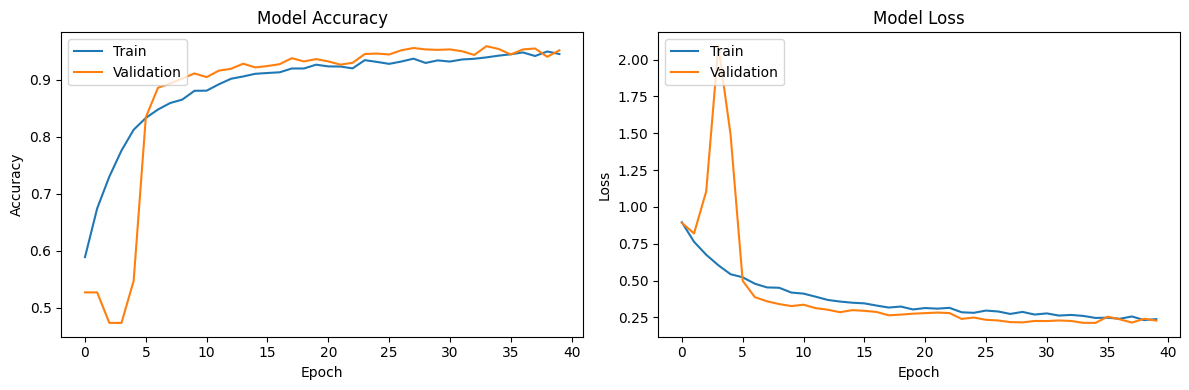

In [41]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()


In [43]:
results = model.evaluate(X_val, y_val)
print(f"Validation Loss: {results[0]:.4f}")
print(f"Validation Accuracy: {results[1]:.4f}")
print(f"Validation AUC: {results[2]:.4f}")


39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9505 - auc: 0.9838 - loss: 0.2233
Validation Loss: 0.2129
Validation Accuracy: 0.9538
Validation AUC: 0.9854


In [52]:
from sklearn.metrics import classification_report, confusion_matrix
# Get predictions
y_pred_probs = model.predict(X_val)  # Get probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert to binary

# Print detailed metrics
print("\nClassification Report:\n")
print(classification_report(y_val, y_pred))

39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       650
           1       0.96      0.94      0.95       584

    accuracy                           0.95      1234
   macro avg       0.95      0.95      0.95      1234
weighted avg       0.95      0.95      0.95      1234



In [53]:
from sklearn.metrics import roc_auc_score
print("\nROC-AUC Score:", roc_auc_score(y_val, y_pred_probs))


ROC-AUC Score: 0.9853846153846154


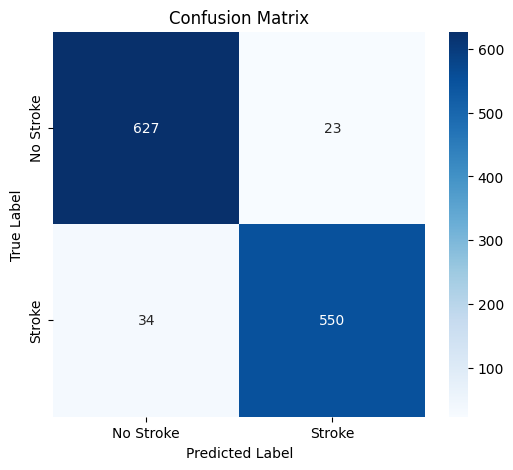

In [54]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


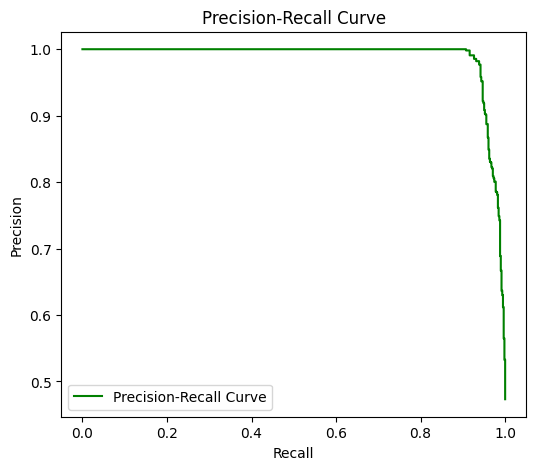

In [57]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_val, y_pred_probs)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
